In [1]:
from esselunga import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters

In [2]:
N_FIGURES_NORMAL = 140
N_FIGURES_SPECIAL = 40

N_NORMAL_IN_PACKET = 5
N_SPECIAL_IN_PACKET = 1

# Simple single case

In [3]:
n_samples = 1000000

In [4]:
samples = []
for i in tqdm(range(n_samples)):
    a = album(N_FIGURES_NORMAL, N_FIGURES_SPECIAL, N_NORMAL_IN_PACKET, N_SPECIAL_IN_PACKET)
    while not a.completed():
        a.open_packet()
    samples.append(a.get_n_packets())
samples = np.asarray(samples)

  6%|▌         | 61343/1000000 [00:22<05:42, 2742.56it/s]


KeyboardInterrupt: 

(68.55, 500)

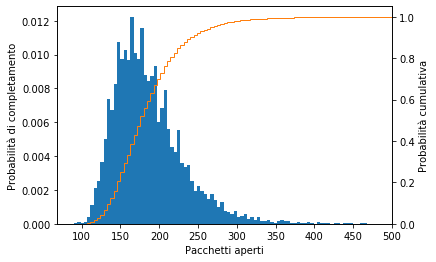

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.hist(samples, bins=100, density=True)
ax2.hist(samples, bins=100, density=True, cumulative=True, histtype="step", color="C1")
ax1.set_xlabel("Pacchetti aperti")
ax1.set_ylabel("Probabilità di completamento")
ax2.set_ylabel("Probabilità cumulativa")

ax1.set_xlim(right=500)

# Generic case with traders

In [6]:
n_samples = 1000000
n_traders = 2

trading_frequency = 1

In [7]:
samples = []
for i in tqdm(range(n_samples)):
    a = album(N_FIGURES_NORMAL, N_FIGURES_SPECIAL, N_NORMAL_IN_PACKET, N_SPECIAL_IN_PACKET)
    traders = [album(N_FIGURES_NORMAL, N_FIGURES_SPECIAL, N_NORMAL_IN_PACKET, N_SPECIAL_IN_PACKET) for j in range(n_traders)]
    j = 0
    while not a.completed():
        j += 1
        a.open_packet()
        for t in traders:
            t.open_packet()
        if j % trading_frequency == 0:
            for t in traders:
                trade_albums(a, t)
    samples.append(a.n_packets)
samples = np.asarray(samples)

  0%|          | 4712/1000000 [00:27<1:36:37, 171.69it/s]


KeyboardInterrupt: 

(37.7, 500)

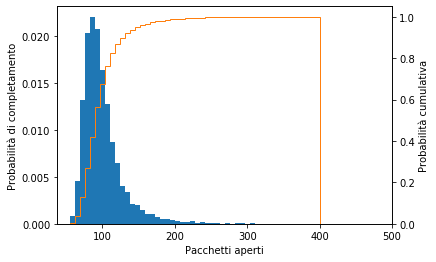

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.hist(samples, bins=50, density=True)
ax2.hist(samples, bins=10, density=True, cumulative=True, histtype="step", color="C1")
ax1.set_xlabel("Pacchetti aperti")
ax1.set_ylabel("Probabilità di completamento")
ax2.set_ylabel("Probabilità cumulativa")

ax1.set_xlim(right=500)